<a href="https://colab.research.google.com/github/FernandoGuillen-lab/DataScience/blob/main/Graficos_estadisticos_seaborn%2C_mpl_toolkits_mplot3d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import seaborn as seabornInstance


from seaborn import load_dataset
from seaborn import lmplot
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
#2.	Descarga el archivo: reto.csv, utiliza los comandos adecuados para cargar el archivo de Excel.

r3=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/reto_3.csv")

r3.columns

Index(['Entidad', 'Clase', 'Automovil', 'Autobus', 'Camioneta'], dtype='object')

In [ ]:
r1=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/0.3z6dlwbp9zv0.iz9i49q40yhreto_1.csv")

r1.columns

Index(['Meses', 'Autobuses', 'Personal ', 'Pasajeros', 'Kilómetros'], dtype='object')

Text(1.19, 215, '')

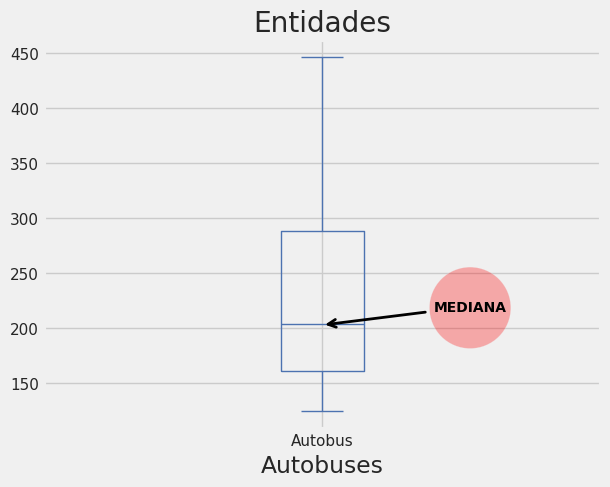

In [ ]:
#3.	Descarga la base de datos de reto_3.csv, genera una gráfica de caja de bigotes para hallar la mediana de los autobuses que tienen las entidades.

plt.style.use(["fivethirtyeight"])
r3["Autobus"].plot.box(color="b")
plt.title ("Entidades")
plt.xlabel("Autobuses")
configuracion={"boxstyle":"circle","facecolor":"red","alpha":0.3}
confi={"size":10,"weight":"bold","color":"black"}
plt.text(1.2,215,"MEDIANA",bbox=configuracion, fontdict=confi)
plt.annotate("",xy=(1,203),xytext=(1.19,215),arrowprops=dict(arrowstyle="->", color="black", lw=2))

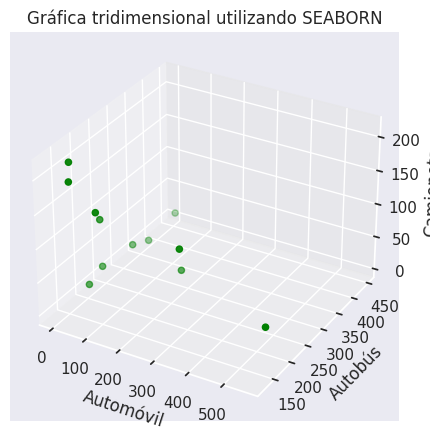

In [ ]:
#4.	Elabora una gráfica en 3 dimensiones donde relacionarás las variables Automóvil, Autobús, y camioneta.

plt.style.use(["fivethirtyeight"])
sns.set(style="darkgrid")
fig=plt.figure()
ax=fig.add_subplot(111,projection="3d")
x=r3["Automovil"]
y=r3["Autobus"]
z=r3["Camioneta"]
ax.set_xlabel("Automóvil")
ax.set_ylabel("Autobús")
ax.set_zlabel("Camioneta")
plt.title("Gráfica tridimensional utilizando SEABORN")
ax.scatter(x,y,z,c="green")

Text(0.5, 1.0, 'Gráfico Residual')

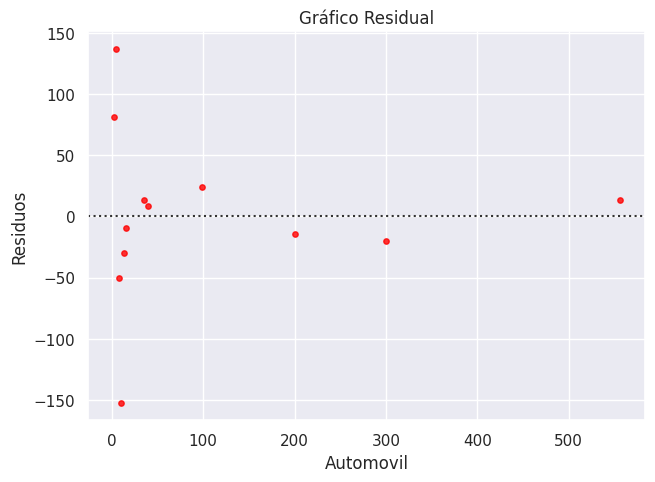

In [ ]:
#5.	Construye una gráfica residual de las 3 variables, automóvil (variable dependiente) junto con autobús y camioneta. Las dos últimas son las variables independientes.

x= r3[["Autobus", "Camioneta"]]
y= r3["Automovil"]

sns.set_style("darkgrid")

reg= LinearRegression()
reg.fit(x,y)

res= reg.predict(x) - y


resdf= pd.DataFrame({"Automovil":y , "Residuales":res })

sns.residplot( x="Automovil", y="Residuales", data= resdf,  color="red", scatter_kws={"s":15})

plt.xlabel("Automovil")
plt.ylabel("Residuos")
plt.title("Gráfico Residual")



Text(0.5, 1.0, 'Relación de ajuste negativa automóvil - autobuses')

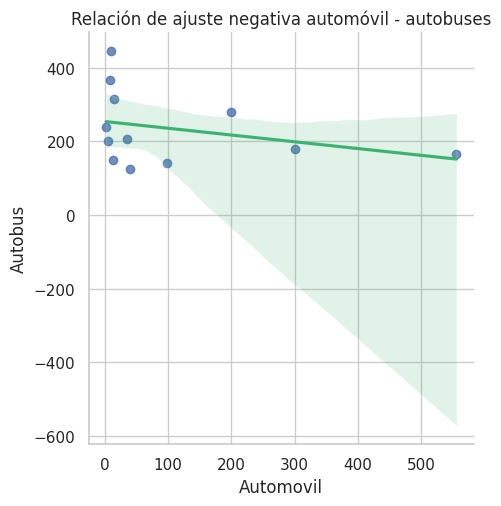

In [ ]:
#6.	Indica si existe alguna relación de ajuste entre la variable automóvil y autobuses.

sns.set_style("whitegrid")

sns.lmplot(data=r3, x= "Automovil", y= "Autobus", line_kws={"color":"mediumseagreen"})

plt.title("Relación de ajuste negativa automóvil - autobuses")


Text(0.5, 1.0, 'Gráfico kdeplot')

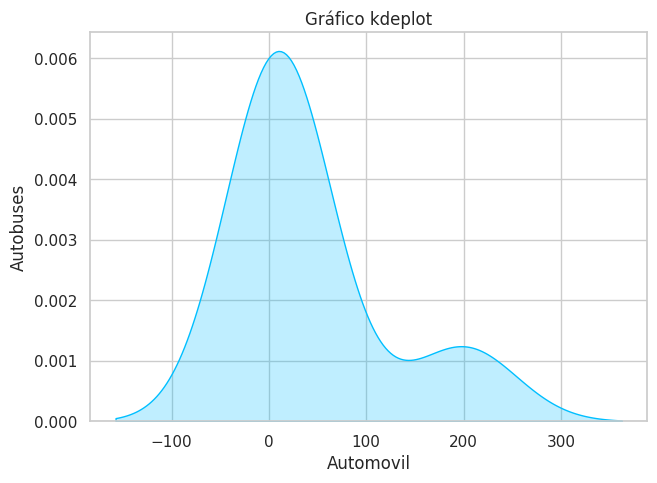

In [ ]:
#7.	Realiza una gráfica de kdeplot que muestre la relación entre los automóviles y el número de autobuses de las primeras 6 entidades.

df=r3.head(6)

sns.set_style("whitegrid")

sns.kdeplot(data=df, x="Automovil", fill=True, color="deepskyblue" )

plt.ylabel("Autobuses")
plt.title("Gráfico kdeplot")


<ipython-input-34-2e4fc5346398>:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.bar(enju["Meses"],enju["Personal "], color=  plt.cm.get_cmap("summer", col)(range(col)))


Text(0.5, 1.0, 'Histograma personal por mes, primer semestre')

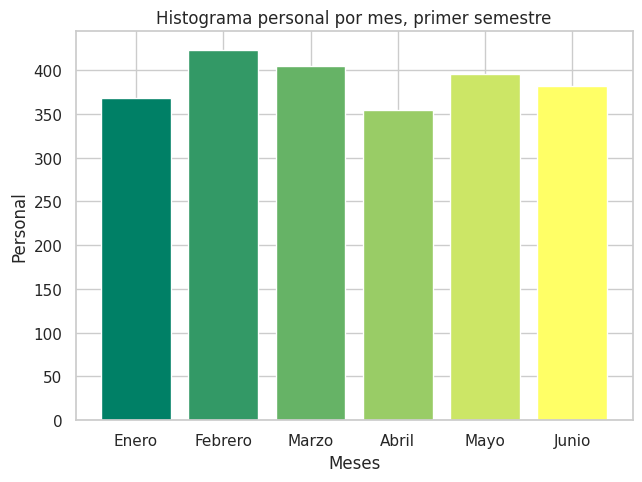

In [ ]:
#8.	Realiza un histograma que relacione el personal con el número de meses. Únicamente de enero a junio.

sns.set_style("whitegrid")

enju=r1[r1["Meses"].isin(["Enero","Febrero","Marzo","Abril","Mayo","Junio"])]

#col= plt.cm.get_cmap("summer", len(enju))

col= len(enju)

plt.bar(enju["Meses"],enju["Personal "], color=  plt.cm.get_cmap("summer", col)(range(col)))

plt.xlabel("Meses")
plt.ylabel("Personal")
plt.title("Histograma personal por mes, primer semestre")

<ipython-input-35-2d58b5a2884c>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colo= plt.cm.get_cmap("Set3", len(enju))


Text(0.5, 1.0, 'Relación automóviles - entidades')

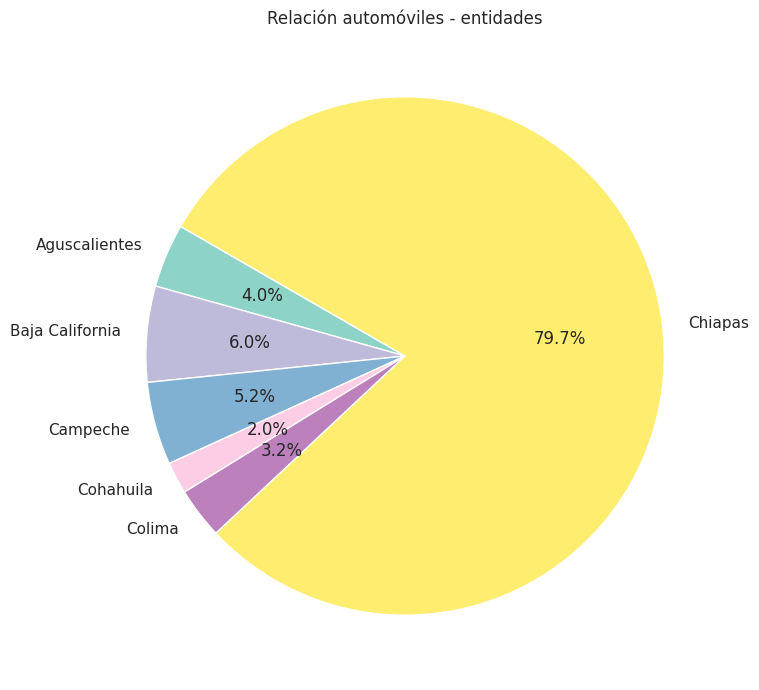

In [ ]:
#9.	Realiza una gráfica de pastel que relacione los automóviles con las primeras 6 entidades de la tabla.

df9=r3.head(6)

ent=df9["Entidad"]
aut=df9["Automovil"]

colo= plt.cm.get_cmap("Set3", len(enju))
plt.figure(figsize=(8,8))
plt.pie(aut, labels=ent, autopct="%1.1f%%", colors=colo(range(len(ent))), startangle=150)

plt.title("Relación automóviles - entidades")

Text(0.5, 1.0, 'Correlación nula')

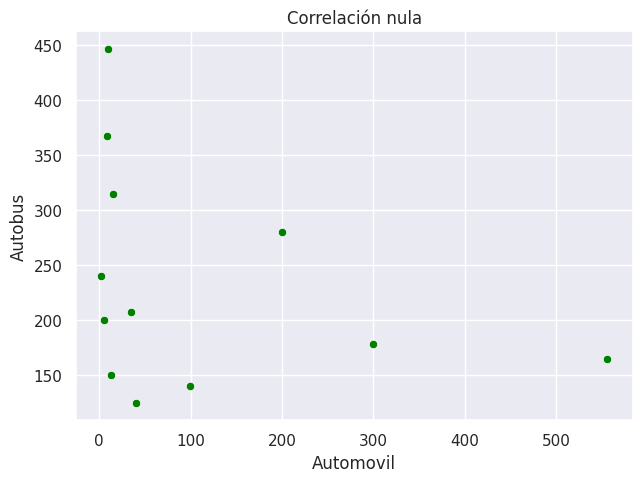

In [ ]:
#10.	De la base de datos obtén la gráfica de dispersión para la relación entre automóvil vs autobús e indica qué tipo de relación tienen los datos independientes.

sns.set_style("darkgrid")

sns.scatterplot(x="Automovil",y="Autobus",c="green", data=r3)

plt.title("Correlación nula")